In [1]:
import pandas as pd
import altair as alt
from altair import datum

In [2]:
data = pd.read_csv('GLB.Ts+dSST.csv')

In [3]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [249]:
rename = {'Jan':'JAN.', 'Feb':'FEB.', 'Mar':'MAR.', 'Apr':'APR.', 'May':'MAY', 'Jun':"JUNE",
          'Jul':"JULY", 'Aug':'AUG.', 'Sep':'SEP.', 'Oct':'OCT.', 'Nov':'NOV.', 'Dec':'DEC.'}

In [403]:
melted = data.rename(columns=rename).melt(id_vars='Year', value_vars=list(rename.values()), var_name="Month")

In [529]:
BLUE = '#4f89cc'

In [530]:
RED = "#f46b6b"

In [540]:
plot = alt.Chart(melted, width=500, height=300).mark_tick(size=39, thickness=5, opacity=1,
                                                   stroke='black', strokeWidth=0.05, strokeOpacity=0.5)\
.encode(
    x=alt.X("Month", sort=list(rename.values()), scale=alt.Scale(zero=False), 
            axis=alt.Axis(grid=False, labelAngle=0, orient='top', title="")), 
    y=alt.Y("Year", scale=alt.Scale(zero=False, clamp=False, range=[5, 400, 400], domain=[1880, 2017]), 
            axis=alt.Axis(grid=False, format="d", labelAngle=0, title="",  tickCount=10,
                          values=[1880, 1900, 1920, 1940, 1960, 1980, 2000, 2017])),
    fill=alt.Color('value', legend=alt.Legend(orient='right', title="", 
                                              values=[], format="+S"),
                   scale=alt.Scale(range=[BLUE, 'white', 'white', RED, RED])))+ \
alt.Chart(pd.DataFrame([[0,0]])).mark_text(text='Monthly global temperatures compared to baseline',
                                           align='left', fontSize=16, fontWeight="bold",
                                           dx=-250, dy=-180)+ \
alt.Chart(pd.DataFrame([[0,0]])).mark_text(text='warmer',
                                           align='left', fontSize=12,
                                           dx=260, dy=-160)+\
alt.Chart(pd.DataFrame([[0,0]])).mark_text(text='colder',
                                           align='left', fontSize=12,
                                           dx=263, dy=70)+\
alt.Chart(pd.DataFrame([[0,0]])).mark_text(text='+2.5F',
                                           align='left', fontSize=12,
                                           dx=290, dy=-145)+\
alt.Chart(pd.DataFrame([[0,0]])).mark_text(text='0F',
                                           align='left', fontSize=12,
                                           dx=290, dy=-26)+\
alt.Chart(pd.DataFrame([[0,0]])).mark_text(text='-1.5F',
                                           align='left', fontSize=12,
                                           dx=290, dy=52)+\
alt.Chart(pd.DataFrame([[0,0]])).mark_text(text='Baseline temperature is average between 1951 and 1980',
                                           align='left', fontSize=12,
                                           dx=-250, dy=270)+\
alt.Chart(pd.DataFrame([[0,0]])).mark_text(text='2017', fontWeight='bold',
                                           align='left', fontSize=10,
                                           dx=-279, dy=246)




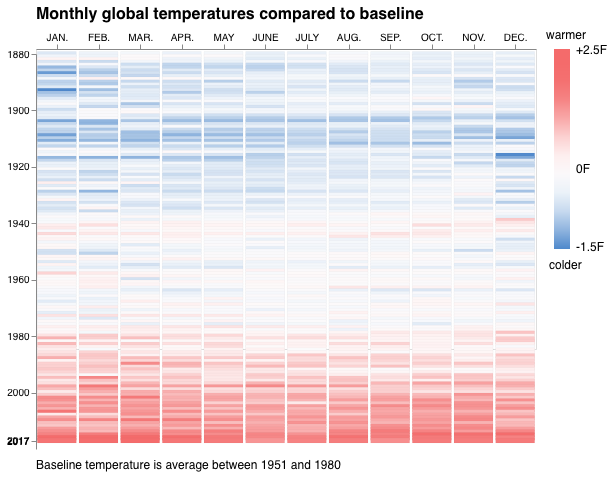

In [541]:
plot.display(renderer='svg')